In [28]:
import matplotlib.pyplot as plt
import numpy as np
from analysisFunctions import importOrbitData, calculateKeplerFromData, findDayAndYearI
from mySecrets import DIAGRAM_DIR
oneDayInSeconds = 86400
oneYearInSeconds = oneDayInSeconds * 365

In [6]:
sunData = importOrbitData("sun_data_1_min_30_yr.txt")
sunKepler = calculateKeplerFromData(sunData)

100%|██████████| 157680/157680 [00:00<00:00, 264020.28it/s]


In [21]:
from analysisFunctions import findMeanOverInterval

yearlyMeanE = findMeanOverInterval(sunKepler["e"],sunData["t"], oneYearInSeconds)
yearlyMeanA = findMeanOverInterval(sunKepler["a"],sunData["t"], oneYearInSeconds)
dayI, yearI = findDayAndYearI(sunData)
yearT = [t/oneYearInSeconds for t in sunData["t"]]

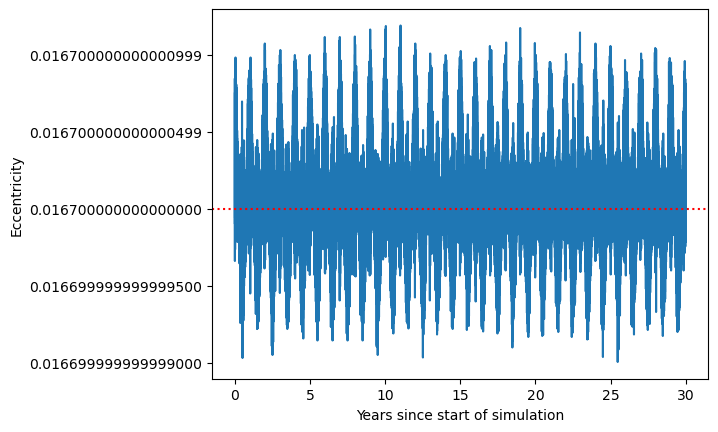

In [34]:
plt.rcParams["axes.formatter.useoffset"]=False
plt.xlabel("Years since start of simulation")
plt.ylabel("Eccentricity")
# plt.plot(list(range(1,31)), yearlyMeanE)
plt.plot(yearT, sunKepler["e"])
plt.axhline(y=0.0167, linestyle="dotted", color="r")
plt.savefig(DIAGRAM_DIR + "sun_e_vs_year.svg")

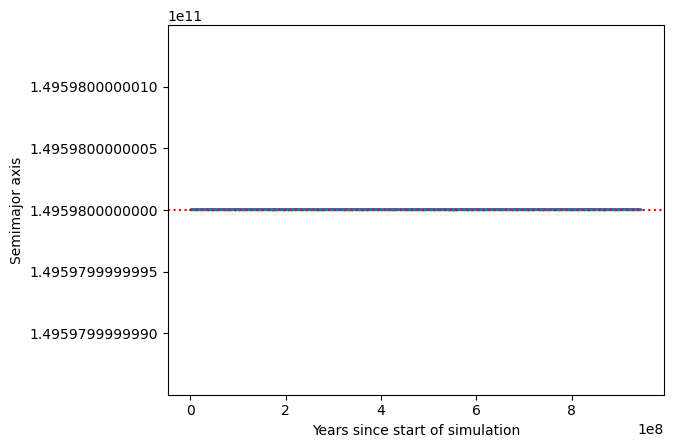

In [35]:
# plt.rcParams["axes.formatter.useoffset"]=False
# plt.plot(list(range(1,31)), yearlyMeanA)
plt.xlabel("Years since start of simulation")
plt.ylabel("Semimajor axis")
plt.plot(sunData["t"], sunKepler["a"])
plt.axhline(y=149.598 * 10**9, linestyle="dotted", color="r")
plt.savefig(DIAGRAM_DIR + "sun_a_vs_year.svg")

In [39]:
max(sunKepler["e"]) - min(sunKepler["e"])

2.1822821327788233e-15

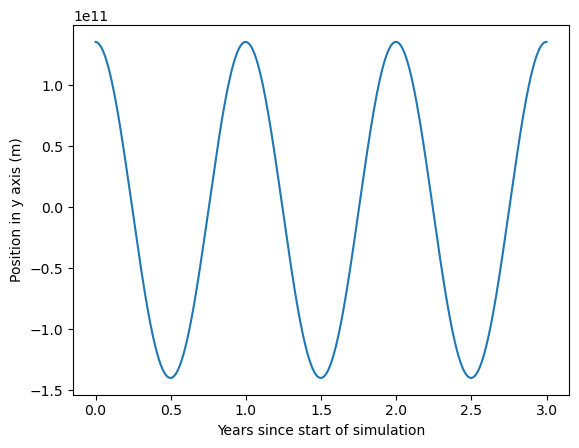

In [36]:
a = 0
b = yearI[3]
plt.xlabel("Years since start of simulation")
plt.ylabel("Position in y axis (m)")
plt.plot(yearT[a:b],sunData["y"][a:b])
plt.savefig(DIAGRAM_DIR + "sun_y_vs_year.svg")